## Calculating Water Surface Temperature using Landsat scenes

This example shows how to obtain the water surface temperature for a single landsat scene

In [1]:
import ee
import sys
sys.path.append(r'C:\artigo_temp_lagos\surfacewatertemperature')
from water_surface_temperature import wst

from IPython.display import Image


In [2]:
try:
    ee.Initialize()
except:
    ee.Authenticate()

In [3]:
ls_id = 'LANDSAT/LC08/C02/T1_L2/LC08_001062_20230821'
#LC08_001062_20230821
image = ee.Image(ls_id)


landsat_crs = image.select('SR_B3').projection().getInfo()['crs']

tefe_region = ee.Geometry.Polygon([
    [-65.10878916270434,-3.8686571096373545],
    [-64.58556528575122,-3.8686571096373545],
    [-64.58556528575122,-3.166861338316249],
    [-65.10878916270434,-3.166861338316249],
    [-65.10878916270434,-3.8686571096373545]]) 



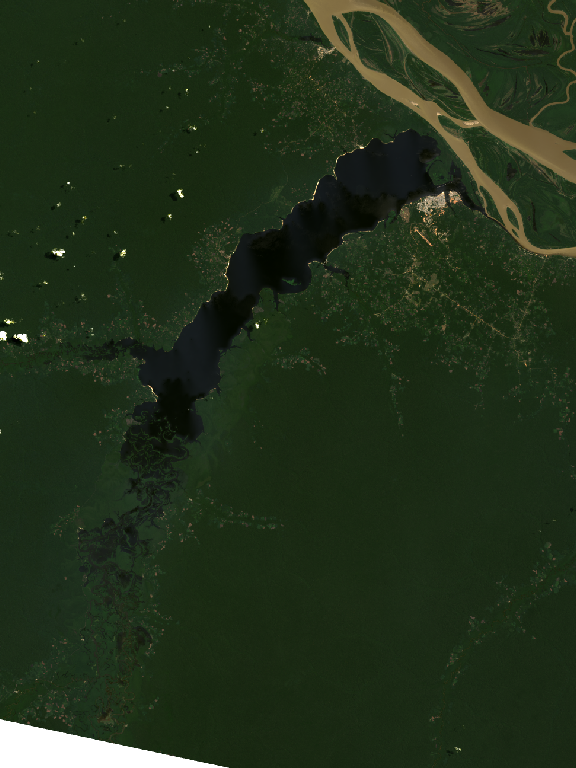

In [24]:
image_url = image.select(['SR_B4', 'SR_B3', 'SR_B2'])\
    .multiply([0.0000275, 0.0000275, 0.0000275])\
    .add([-0.2, -0.2, -0.2])\
    .getThumbURL({'min': 0.0, 'max': 0.23, 
                  'region': tefe_region, 'dimensions': 768})
Image(image_url, embed=True, format='png')

In [4]:
lst = wst.Image.from_image_id()


'''    .getThumbURL({'min': -1, 'max': 1, 'palette': ndvi_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')'''

SyntaxError: invalid syntax (275859856.py, line 1)